## 1. Importing Libraries and Reading the Dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [38]:
# Load the dataset into a pandas DataFrame
#dataset = pd.read_csv('Online Retail.csv',encoding="utf8")



In [39]:
dataset = pd.read_excel('Online Retail.xls')

In [40]:
dataset.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51350,540646,20719,WOODLAND CHARLOTTE BAG,2,2011-01-10 14:32:00,1.66,NaN,United Kingdom
40782,539742,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-21 15:20:00,4.21,NaN,United Kingdom
59144,541273,22150,3 STRIPEY MICE FELTCRAFT,6,2011-01-17 11:21:00,1.95,13155.0,United Kingdom


## 2. Exploartory  data Analysis
EDA is where we get the basic understanding of the data in hand which then helps us in the further process of Data Cleaning & Data Preparation.

In [41]:
print(dataset.count())  # Count the Number of Non-Missing Values for each Variable
print(dataset.shape)
dataset.describe()      #gives the summary of all the numerical variables present in our data frame

InvoiceNo      65535
StockCode      65535
Description    65369
Quantity       65535
InvoiceDate    65535
UnitPrice      65535
CustomerID     40218
Country        65535
dtype: int64
(65535, 8)


,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    65535 non-null  object        
 1   StockCode    65535 non-null  object        
 2   Description  65369 non-null  object        
 3   Quantity     65535 non-null  int64         
 4   InvoiceDate  65535 non-null  datetime64[ns]
 5   UnitPrice    65535 non-null  float64       
 6   CustomerID   40218 non-null  float64       
 7   Country      65535 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [43]:
dataset.duplicated()   #  check the duplicate in the dataset
#df.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
65530    False
65531    False
65532    False
65533    False
65534    False
Length: 65535, dtype: bool

## 3. Data Preprocessing and Visualization
Ensure that the dataset is properly preprocessed, with missing values handled, datatype corrected and categorical variables encoded if necessary.

In [44]:
dataset.isnull().sum()   #Detecting the Missing Values

InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25317
Country            0
dtype: int64

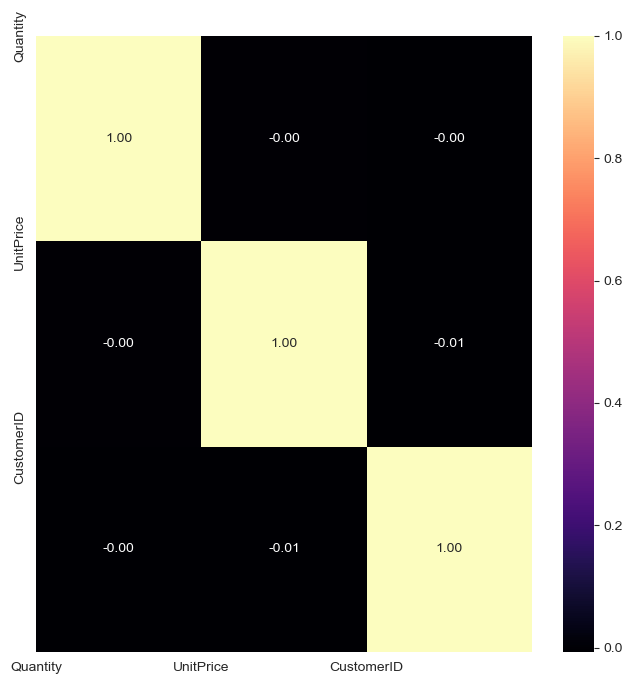

In [45]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [46]:
dataset.columns   # checking the column names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Get the column to use for clustering

In [47]:
cols_to_consider = ['Quantity', 'UnitPrice']


In [48]:
subset = dataset[cols_to_consider]

subset

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
65530,1,2.46
65531,2,1.63
65532,1,1.63
65533,1,1.25


In [49]:
subset.isnull().sum()

Quantity     0
UnitPrice    0
dtype: int64

In [50]:
subset.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.000528
UnitPrice,-0.000528,1.000000


<AxesSubplot:>

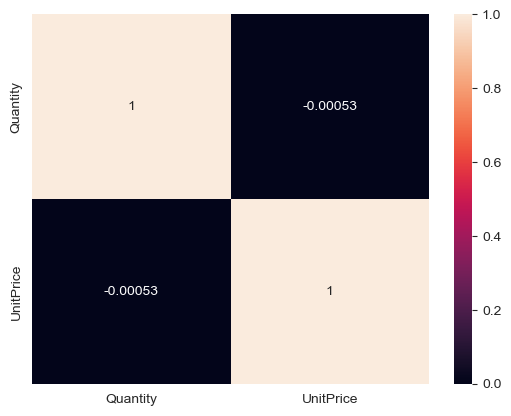

In [51]:
sns.heatmap(subset.corr(), annot = True)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [53]:
subset_scaled = scaler.fit_transform(subset)

In [54]:
subset_scaled

array([[-0.00571228, -0.02268291],
       [-0.00571228, -0.0169198 ],
       [-0.00087775, -0.02131074],
       ...,
       [-0.01779858, -0.02899488],
       [-0.01779858, -0.03160199],
       [-0.01779858,  0.10245873]])

In [55]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)
subset_scaled_df

,Quantity,UnitPrice
0,-0.005712,-0.022683
1,-0.005712,-0.016920
2,-0.000878,-0.021311
3,-0.005712,-0.016920
4,-0.005712,-0.016920
...,...,...
65530,-0.017799,-0.023300
65531,-0.015381,-0.028995
65532,-0.017799,-0.028995
65533,-0.017799,-0.031602


In [56]:
from sklearn.cluster import KMeans

In [57]:
cluster_range = range(1, 9)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 100, init = 'k-means++')
    clusters.fit(subset_scaled_df)
    cluster_errors.append(clusters.inertia_)

In [58]:
clusters_df = pd.DataFrame({'num_clusters' : cluster_range, 'cluster_errors' : cluster_errors})

In [59]:
clusters_df

,num_clusters,cluster_errors
0,1,131070.000000
1,2,71129.712625
2,3,38938.667754
3,4,6763.113464
4,5,3250.255993
5,6,2160.202078
6,7,1538.965336
7,8,1026.124600


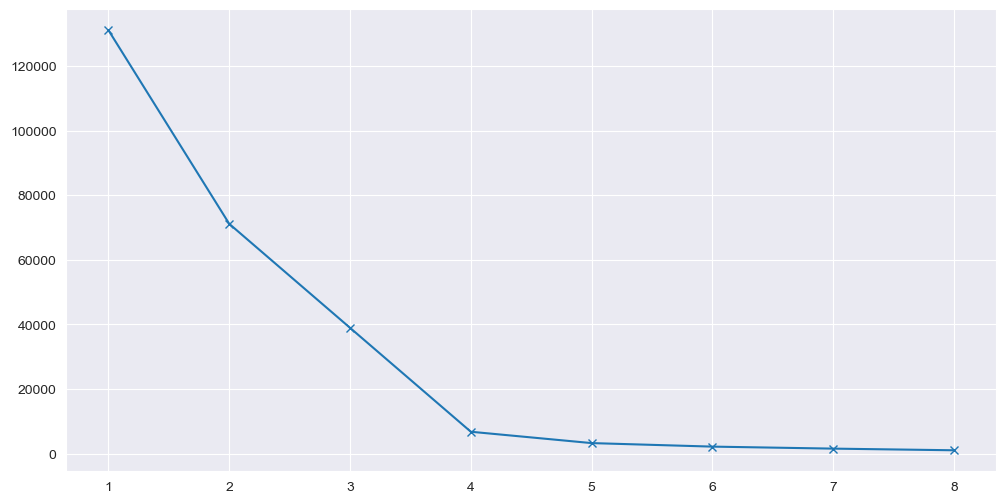

In [60]:
plt.figure(figsize = (12, 6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'x')

In [61]:
kmeans = KMeans(n_clusters = 4, n_init = 15, random_state = 2345)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [62]:
centroids = kmeans.cluster_centers_
centroids

array([[ 2.74002292e-03, -9.15091033e-03],
       [-2.18273506e-02,  9.99456492e+01],
       [-1.79417258e+02, -3.30427683e-02]])

In [63]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df.columns)
centroid_df 

,Quantity,UnitPrice
0,0.002740,-0.009151
1,-0.021827,99.945649
2,-179.417258,-0.033043


In [69]:
dataset = subset_scaled_df[:]

In [70]:
dataset['KmeansLabel'] = kmeans.labels_

C:\Users\DELL\AppData\Local\Temp\ipykernel_18104\4286209662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['KmeansLabel'] = kmeans.labels_


In [71]:
dataset.sample(7)

,Quantity,UnitPrice,KmeansLabel
55266,0.008791,-0.037296,0
61598,0.269856,-0.037296,0
64818,0.008791,-0.037296,0
43655,0.003957,-0.034346,0
21526,0.008791,-0.028858,0
249,-0.010547,0.000644,0
11770,-0.010547,-0.019939,0
